## Project: Employee Turnover Analytics

#### Importing pandas lib. and data set

In [113]:
import pandas as pd

In [114]:
ETA= pd.read_excel('F:\IITK AI & ML\__MACOSX\hr_comma_sep.xlsx')

In [115]:
ETA

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [116]:
ETA.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [117]:
ETA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


#### Finding Missing Value

In [118]:
ETA.isna().sum(axis=0)

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [119]:
# NO missing value in the data

#### Performing Exploratory Data Analysis

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

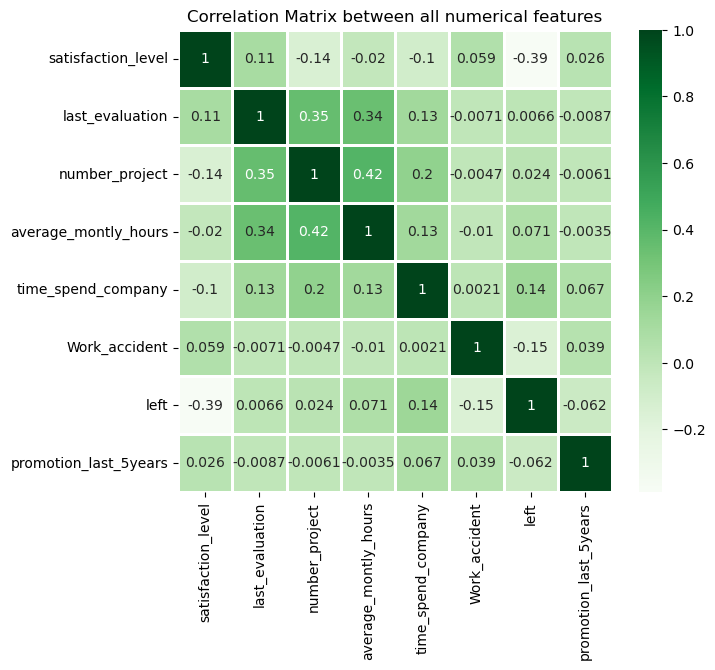

In [121]:
plt.figure(figsize=(7,6))
plt.title('Correlation Matrix between all numerical features')
sns.heatmap(ETA[['satisfaction_level','last_evaluation','number_project','average_montly_hours',
                 'time_spend_company','Work_accident','left','promotion_last_5years']].corr(),cmap='Greens',annot=True,linewidths=2)
plt.show()

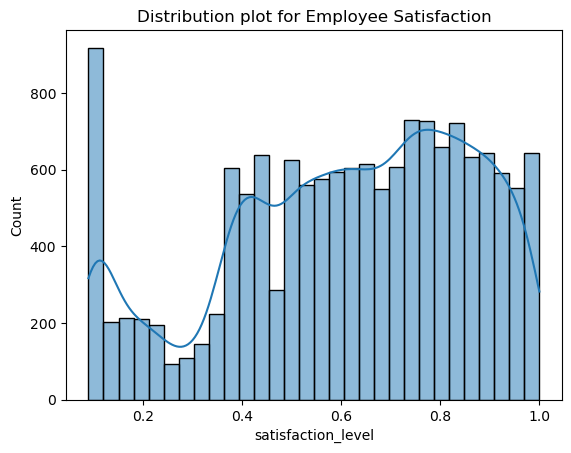

In [122]:
sns.histplot(ETA['satisfaction_level'],kde=True)
plt.title('Distribution plot for Employee Satisfaction')
plt.show()

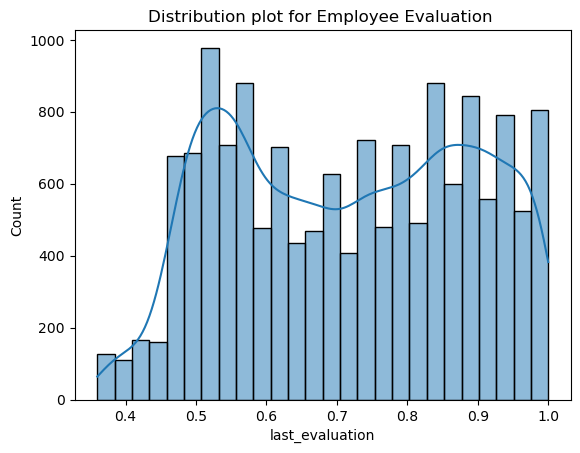

In [123]:
sns.histplot(ETA['last_evaluation'],kde=True)
plt.title('Distribution plot for Employee Evaluation ')
plt.show()

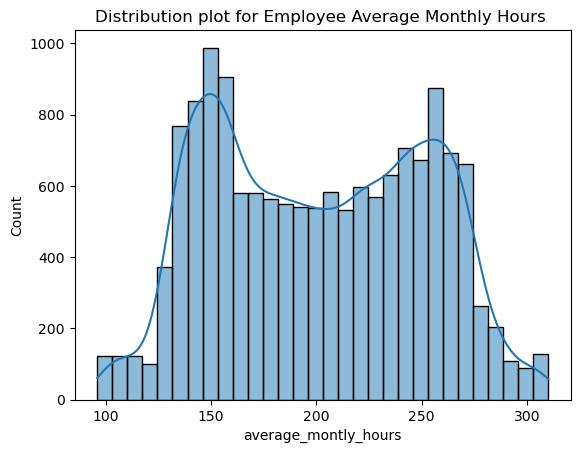

In [124]:
sns.histplot(ETA['average_montly_hours'],kde=True)
plt.title('Distribution plot for Employee Average Monthly Hours ')
plt.show()

Creating a bar plot for Employee Project Count of both employees who left and who stayed in the organization

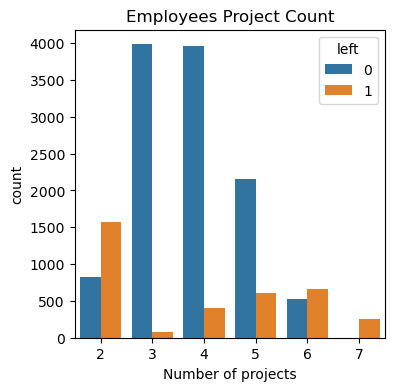

In [125]:
plt.figure(figsize=(4,4))
sns.countplot(x=ETA['number_project'],hue=ETA['left'])
plt.title('Employees Project Count')
plt.xlabel('Number of projects')
plt.show()

 After seeing the above bar chart we can say that people with less no. of projects have more tendency to leave the company.
 But we can also see that people with more no. of project also tend to leave the company as they have gained much exprience.

## Clustering Analysis

Selecting features like satisfaction_level, last_evaluation and left for the clustering algorithm

In [126]:
emp_left= ETA.loc[ETA['left']==1,['satisfaction_level','last_evaluation']]

In [127]:
emp_left

,satisfaction_level,last_evaluation
0,0.38,0.53
1,0.80,0.86
2,0.11,0.88
3,0.72,0.87
4,0.37,0.52
...,...,...
14994,0.40,0.57
14995,0.37,0.48
14996,0.37,0.53
14997,0.11,0.96


Standardising the data before clustering to prevent variables with larger scales from 
dominating how clusters are defined.

In [128]:
from sklearn.preprocessing import StandardScaler

In [129]:
ss=StandardScaler()

In [130]:
emp_left_std= ss.fit_transform(emp_left)

Performing kmeans clustering on satisfaction_level, last_evaluation and left by making 3 clusters

In [131]:
from sklearn.cluster import KMeans

In [132]:
kmeans= KMeans(n_clusters=3,random_state=42,n_init='auto')

In [133]:
emp_left['Clusters']= kmeans.fit_predict(emp_left_std)

In [134]:
emp_left

,satisfaction_level,last_evaluation,Clusters
0,0.38,0.53,0
1,0.80,0.86,1
2,0.11,0.88,2
3,0.72,0.87,1
4,0.37,0.52,0
...,...,...,...
14994,0.40,0.57,0
14995,0.37,0.48,0
14996,0.37,0.53,0
14997,0.11,0.96,2


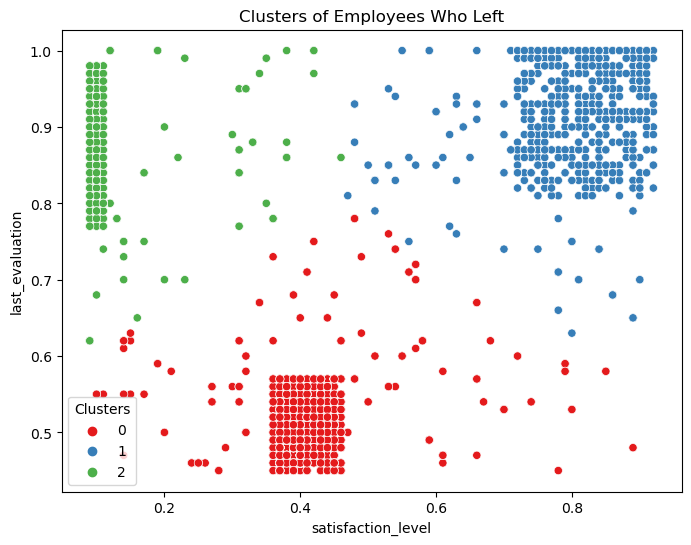

In [135]:
plt.figure(figsize=(8,6))
sns.scatterplot( x=emp_left['satisfaction_level'], y=emp_left['last_evaluation'],hue= emp_left['Clusters'],data= emp_left,palette='Set1' )
plt.title('Clusters of Employees Who Left')
plt.show()

From the above scatter plot we can conclude that there is no correlation between satisfaction level 
and last evaluation because two of the clusters have same last evalution score but totally different
satisfation level.

But we can also see that one of the cluster is having almost the same satisfaction and evaluation score

## Handling the Left Class Imbalance using SMOTE technique

Seperating Catagorical and Nnumerical columns

In [136]:
eta_numeric= ETA.drop(['sales','salary'],axis= 1)
eta_cat= ETA[['sales','salary']]

In [137]:
eta_numeric

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [138]:
eta_cat

,sales,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low
...,...,...
14994,support,low
14995,support,low
14996,support,low
14997,support,low


In [139]:
eta_cat= pd.get_dummies(eta_cat, dtype=int)

In [140]:
eta_cat

,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,0,1,0,0,1,0
14995,0,0,0,0,0,0,0,0,1,0,0,1,0
14996,0,0,0,0,0,0,0,0,1,0,0,1,0
14997,0,0,0,0,0,0,0,0,1,0,0,1,0


Joining the catagorical and numeric columns 

In [141]:
ETA_new = pd.concat([eta_numeric, eta_cat], axis=1, join='inner')

In [142]:
ETA_new

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


Dividing the dataset into train and test in the ratio of 80:20 using the train test split function

In [143]:
from sklearn.model_selection import train_test_split 

In [144]:
X=ETA_new.drop('left',axis=1)
y=ETA_new['left']

In [145]:
X_train,X_test,y_train,y_test= train_test_split(X, y , test_size=0.2, random_state=123)

In [146]:
pip install --upgrade scikit-learn imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [147]:
SC=StandardScaler()

In [148]:
X_train_std= SC.fit_transform(X_train)
X_test_std= SC.transform(X_test)

In [149]:
X_train.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales_IT', 'sales_RandD', 'sales_accounting',
       'sales_hr', 'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

Performing the SMOTE oversampling technique on the train data to transform the imbalanced
data set to balanced one.

In [150]:
from imblearn.over_sampling import SMOTE

In [151]:
smote= SMOTE(random_state=123)

In [152]:
X_train_resample,y_train_resample= smote.fit_resample(X_train_std, y_train)

In [153]:
X_train_resample

array([[-1.21867584, -0.43811008,  1.78101128, ..., -0.29756031,
         1.02506612, -0.87039083],
       [-0.09319181,  0.55314951,  0.16106326, ..., -0.29756031,
         1.02506612, -0.87039083],
       [-0.93730483, -1.19613212, -1.45888477, ..., -0.29756031,
         1.02506612, -0.87039083],
       ...,
       [ 0.67052949,  1.60624316,  0.97103727, ..., -0.29756031,
        -0.97554682,  1.14890916],
       [-0.73632554, -1.42936967, -1.45888477, ..., -0.29756031,
        -0.97554682,  1.14890916],
       [ 0.91170464,  1.31117155,  0.97103727, ..., -0.29756031,
         1.02506612, -0.87039083]])

In [154]:
y_train_resample

0        0
1        0
2        1
3        0
4        0
        ..
18269    1
18270    1
18271    1
18272    1
18273    1
Name: left, Length: 18274, dtype: int64

## Performing 5-Fold Cross-Validation

Going to perform 5-Fold Cross Validation on different models like Logistic Regression, Random Forest and 
Gradient Boosting and with the help of classification report find out which model is best for predictions.

### Logistic Regression

In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix

In [157]:
logR=LogisticRegression(random_state=42)

In [158]:
logR.fit(X_train_resample,y_train_resample)

LogisticRegression(random_state=42)

In [159]:
logR_cv_score= cross_val_score(logR,X_train_resample ,y_train_resample, cv=5, scoring='accuracy')

In [160]:
print('Logistic Regression CV score:',logR_cv_score)
print('Logistic Regression mean CV score:',logR_cv_score.mean())

Logistic Regression CV score: [0.77127223 0.76908345 0.78659371 0.77975376 0.7755884 ]
Logistic Regression mean CV score: 0.7764583085305761


In [161]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [162]:
logR_cv_predict= cross_val_predict(logR,X_train_resample,y_train_resample,cv=5)

In [163]:
print(classification_report(y_train_resample,logR_cv_predict))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77      9137
           1       0.76      0.80      0.78      9137

    accuracy                           0.78     18274
   macro avg       0.78      0.78      0.78     18274
weighted avg       0.78      0.78      0.78     18274



### Random Forest Classifier

In [164]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier 

In [165]:
rfc= RandomForestClassifier(random_state=123)

In [166]:
rfc.fit(X_train_resample,y_train_resample)

RandomForestClassifier(random_state=123)

In [167]:
rfc_cv_score= cross_val_score(rfc, X_train_resample ,y_train_resample, cv=5, scoring='accuracy')

In [168]:
print('Random Forest CV score:',rfc_cv_score)
print('Random Forest mean CV score:',rfc_cv_score.mean())

Random Forest CV score: [0.97783858 0.98549932 0.99233926 0.99069767 0.99042146]
Random Forest mean CV score: 0.987359256988013


In [169]:
rfc_cv_predict= cross_val_predict(rfc, X_train_resample ,y_train_resample, cv=5)

In [170]:
print(classification_report(y_train_resample,rfc_cv_predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9137
           1       1.00      0.98      0.99      9137

    accuracy                           0.99     18274
   macro avg       0.99      0.99      0.99     18274
weighted avg       0.99      0.99      0.99     18274



### Gradient Boosting Classifier

In [171]:
gdbc= GradientBoostingClassifier(random_state=32)

In [172]:
gdbc.fit(X_train_resample,y_train_resample)

GradientBoostingClassifier(random_state=32)

In [173]:
gdbc_cv_score= cross_val_score(gdbc, X_train_resample ,y_train_resample, cv=5, scoring='accuracy')

In [174]:
print('Gradient Boosting CV score:',gdbc_cv_score)
print('Gradient Boosting mean CV score:',gdbc_cv_score.mean())

Gradient Boosting CV score: [0.95430917 0.96333789 0.97346101 0.97291382 0.97181171]
Gradient Boosting mean CV score: 0.9671667202031842


In [175]:
gdbc_cv_predict= cross_val_predict(gdbc, X_train_resample ,y_train_resample, cv=5)

In [176]:
print(classification_report(y_train_resample,gdbc_cv_predict))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      9137
           1       0.98      0.96      0.97      9137

    accuracy                           0.97     18274
   macro avg       0.97      0.97      0.97     18274
weighted avg       0.97      0.97      0.97     18274



## Model Evaluation

With the help of ROC curve and ROC AUC score for each of the above models we are finding out the best model. 
And with the help of confusion metrics we will find the metric to be used recall or precision

### Logistic Regression Model Evaluation

In [177]:
from sklearn.metrics import roc_auc_score, roc_curve

In [178]:
logR_cv_predict_prob= cross_val_predict(logR,X_train_resample,y_train_resample,cv=5,method='predict_proba')

In [179]:
fpr, tpr, thresh = roc_curve(y_train_resample, logR_cv_predict_prob[:,1], pos_label=1 )

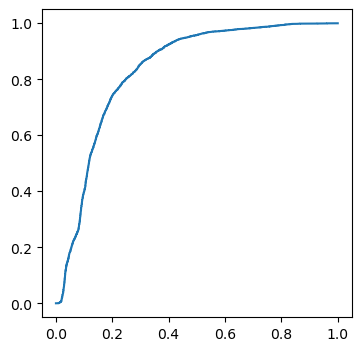

In [180]:
plt.figure(figsize=(4,4))
plt.plot(fpr, tpr)
plt.show()

In [181]:
roc_auc_score(y_train_resample, logR_cv_predict_prob[:,1])

0.8337600838303811

In [182]:
logR_cm= confusion_matrix(y_train_resample,logR_cv_predict)

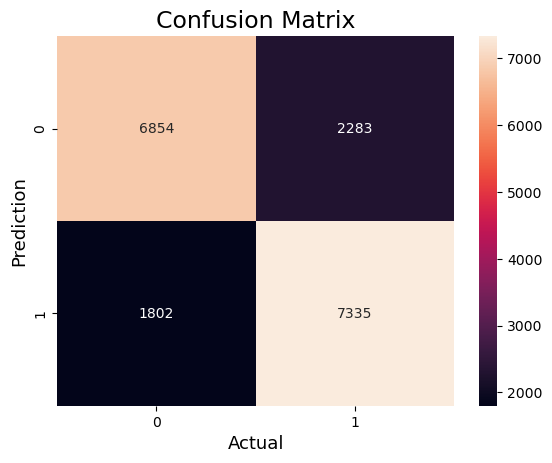

In [183]:
sns.heatmap(logR_cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

### Random Forest Model Evaluation

In [184]:
rfc_cv_predict_prob= cross_val_predict(rfc, X_train_resample ,y_train_resample, cv=5, method='predict_proba')

In [185]:
fpr, tpr, thresh= roc_curve(y_train_resample,rfc_cv_predict_prob[:,1],pos_label=1)

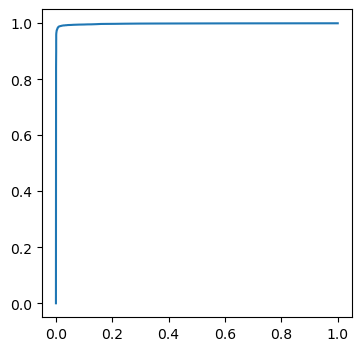

In [186]:
plt.figure(figsize=(4,4))
plt.plot(fpr, tpr)
plt.show()

In [187]:
roc_auc_score(y_train_resample,rfc_cv_predict_prob[:,1])

0.9981938202404321

In [188]:
rfc_cm= confusion_matrix(y_train_resample,rfc_cv_predict)

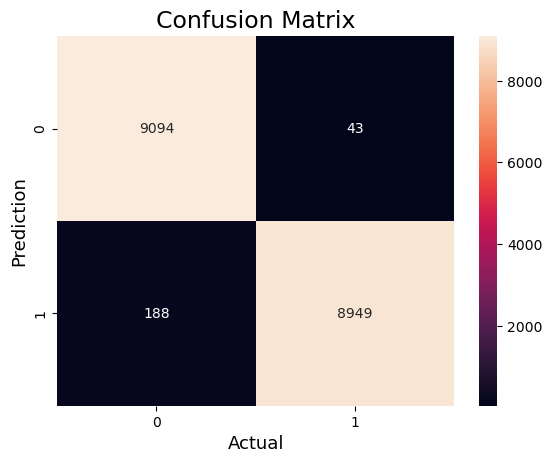

In [189]:
sns.heatmap(rfc_cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

### Gradient Boosting Model Evaluation

In [190]:
gdbc_cv_predict_prob= cross_val_predict(gdbc, X_train_resample ,y_train_resample, cv=5, method='predict_proba')

In [191]:
fpr,tpr,thresh= roc_curve(y_train_resample,gdbc_cv_predict_prob[:,1],pos_label=1)

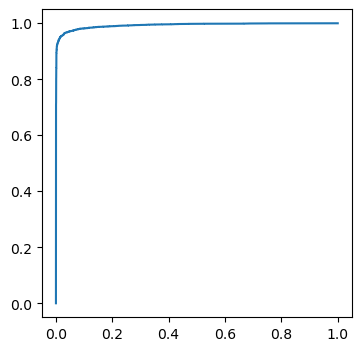

In [192]:
plt.figure(figsize=(4,4))
plt.plot(fpr, tpr)
plt.show()

In [193]:
roc_auc_score(y_train_resample,gdbc_cv_predict_prob[:,1])

0.9929930751799768

In [194]:
gdbc_cm= confusion_matrix(y_train_resample,gdbc_cv_predict)

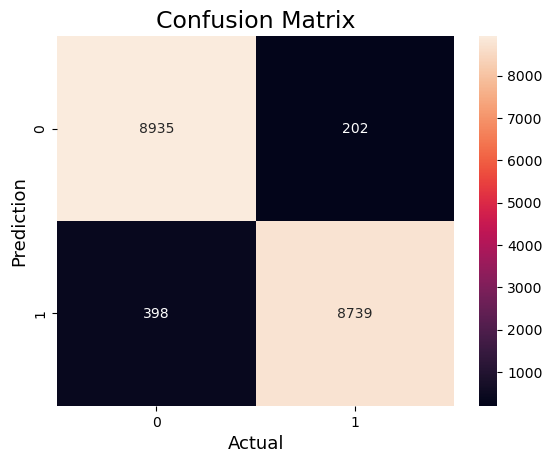

In [195]:
sns.heatmap(gdbc_cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

In the employee turnover problem we have to reduce the number of people leaving the company. 
So for that we would use recall as the matrics because it is used for false negatives.
Here false nagetive is that, a person who is leaving the company but the model has
classified it into a person not leaving the company. 

## Retention Startegies

Average ROC scores for all the three models:

          Logistic Regression:- 0.8337600838303811
          Random forest:- 0.9981938202404321
          Gradient Boosting:- 0.9929930751799768

Since Random Forest has high ROC score we will use this model to predict the outcome for the test data

In [213]:
rfc.fit(X_train_resample,y_train_resample)

RandomForestClassifier(random_state=123)

In [214]:
rfc_test_predict= rfc.predict(X_test_std)

In [215]:
rfc_test_predict_proba = rfc.predict_proba(X_test_std)[:,1]

In [216]:
rfc_test_predict_proba

array([0.  , 0.  , 0.01, ..., 1.  , 0.01, 0.02])

In [217]:
fpr,tpr,thresh= roc_curve(y_test,rfc.predict_proba(X_test_std)[:,1])

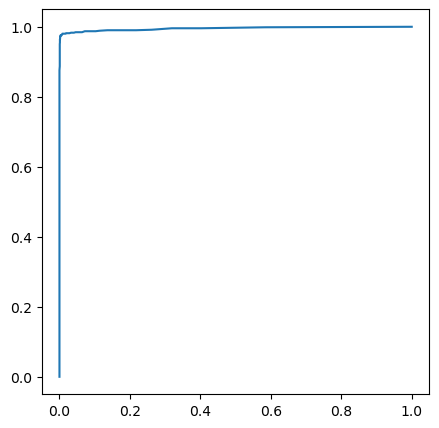

In [218]:
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr)
plt.show()

In [219]:
roc_auc_score(y_test,rfc.predict_proba(X_test_std)[:,1])

0.9951364233257138

In [220]:
rfc_cm_test= confusion_matrix(y_test,rfc.predict(X_test_std))

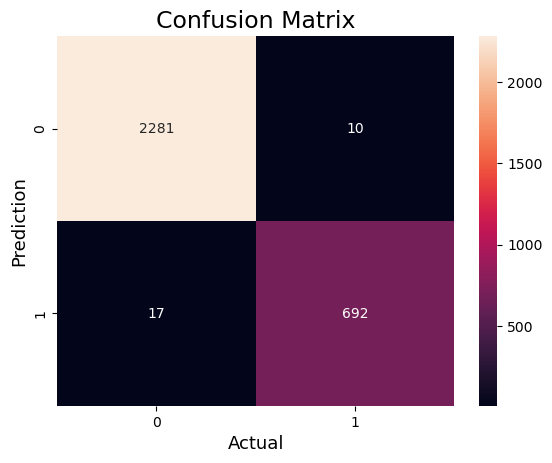

In [221]:
sns.heatmap(rfc_cm_test,
            annot=True,
            fmt='g')
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

Creating a function named as categorize_employees to convert the predicted probabilities 
into 4 different zones accordining to the possibility of that employee to leave the company.

In [222]:
def categorize_employees(proba):
    if proba< .20:
        return 'safe zone (Green)'
    elif .20<= proba < .60:
        return 'Low Risk Zone (Yellow)'
    elif .60<= proba < .90:
        return 'Medium Risk Zone (Orange)'
    else:
        return 'High risk Zone (Red)'
        

In [223]:
risk_zones= pd.Series(rfc_test_predict_proba).apply(categorize_employees)

In [224]:
X= risk_zones.value_counts()

In [225]:
X

safe zone (Green)            2215
High risk Zone (Red)          655
Low Risk Zone (Yellow)         92
Medium Risk Zone (Orange)      38
Name: count, dtype: int64

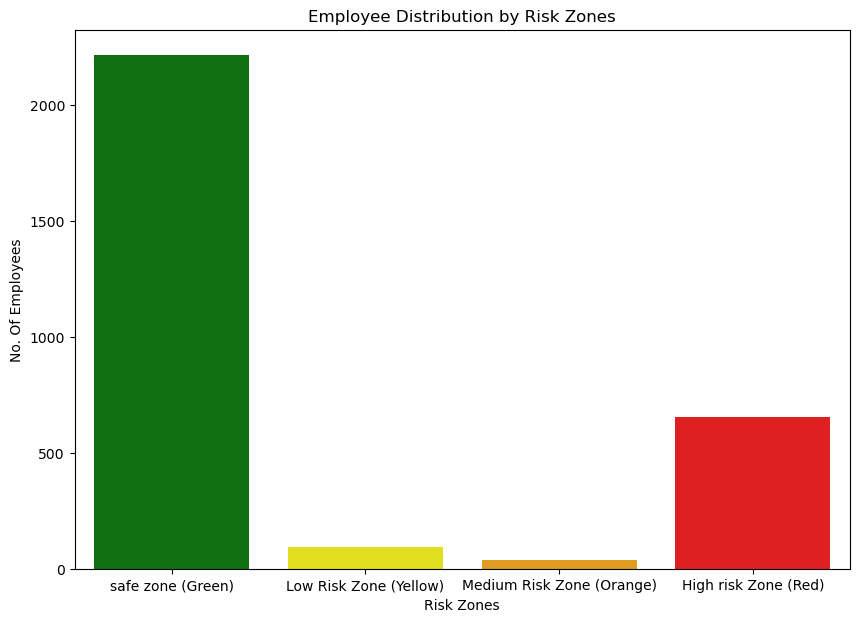

In [226]:
plt.figure(figsize=(10,7))
sns.countplot(x=risk_zones,order= ['safe zone (Green)','Low Risk Zone (Yellow)','Medium Risk Zone (Orange)','High risk Zone (Red)'], 
              palette=['Green','Yellow','orange', 'red'])
plt.title('Employee Distribution by Risk Zones')
plt.xlabel('Risk Zones')
plt.ylabel('No. Of Employees')
plt.show()

Safe Zone (Green): Regular feedback sessions, training programs, and employee 
                     recognition to maintain job satisfaction.
                     
Low Risk Zone (Yellow): Identify early signs of dissatisfaction, enhance communication,
                         and provide career growth opportunities.
                         
Medium Risk Zone (Orange): Conduct employee surveys, improve work-life balance, and 
                           offer flexible working hours.
                           
High Risk Zone (Red): Intensive employee engagement programs, personal development plans, 
                        and immediate manager support.
